In [146]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
#Loading the dataset
df_train = pd.read_csv(r'C:\Users\skkav\Documents\Data Analytics\Python\Regression of Used Car Prices\train.csv')
df_test = pd.read_csv(r'C:\Users\skkav\Documents\Data Analytics\Python\Regression of Used Car Prices\test.csv')

df_train = df_train.drop(columns='id', axis=1)

In [148]:
#Displaying the first 5 rows of the train dataset
print("Train dataset:")
df_train.head(5)

Train dataset:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [149]:
#Displaying the first 5 rows of the test dataset
print("Test dataset:")
df_test.head(5)

Test dataset:


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [150]:
#Understanding the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [151]:
#Understanding the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [152]:
df_train.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [153]:
df_test.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [154]:
print("Shape of train dataset: ", df_train.shape)
print("Share of test dataset: ", df_test.shape)

Shape of train dataset:  (188533, 12)
Share of test dataset:  (125690, 12)


In [155]:
#Data Cleaning
#Finding duplicates
df_train.duplicated()
#we do not have any duplicated rows

0         False
1         False
2         False
3         False
4         False
          ...  
188528    False
188529    False
188530    False
188531    False
188532    False
Length: 188533, dtype: bool

In [156]:
#Finding null values
df_train.isnull().sum()
#we have empty values in the following columns: fuel_type, accident, and clean_title

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [157]:
#Filling the null values of the columns: accident and clean_title with the mode values
print("Mode value of clean_title column: ", df_train['clean_title'].mode())
print("Mode value of accident column: ", df_train['accident'].mode())

df_train['accident'].fillna(df_train['accident'].mode()[0], inplace=True)
df_train['clean_title'].fillna(df_train['clean_title'].mode()[0], inplace=True)

Mode value of clean_title column:  0    Yes
Name: clean_title, dtype: object
Mode value of accident column:  0    None reported
Name: accident, dtype: object


C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\3549944411.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['accident'].fillna(df_train['accident'].mode()[0], inplace=True)
C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\3549944411.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [158]:
#Verifying the previous step
df_train.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
dtype: int64

In [159]:
#Before filling the missing values for the column, fuel_type, we will first understand the data better
df_train['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [160]:
#Filtering rows where fuel type is NaN
nan_fuel_type = df_train[df_train['fuel_type'].isna()]
nan_fuel_type

#It can be observed that all tesla cars are electric and a few ford cars are electric

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
11,Tesla,Model S P100D,2015,81500,NaN,Electric Motor Electric Fuel System,1-Speed A/T,Gray,White,None reported,Yes,19000
32,Tesla,Model S P100D,2018,30300,NaN,518.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes,64000
51,Tesla,Model 3 Long Range,2020,38360,NaN,Dual Motor - Standard,Automatic,White,Black,None reported,Yes,59598
52,Tesla,Model X 75D,2021,88000,NaN,518.0HP Electric Motor Electric Fuel System,1-Speed A/T,Black,Black,None reported,Yes,53600
161,Tesla,Model S Long Range,2021,9500,NaN,670.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,89999
...,...,...,...,...,...,...,...,...,...,...,...,...
188368,Ford,Mustang Mach-E Premium,2022,2058,NaN,Standard Range Battery,Automatic CVT,Red,Black,None reported,Yes,27785
188455,Ford,Mustang Mach-E GT,2022,8000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,White,None reported,Yes,115000
188462,Ford,Mustang Mach-E GT,2023,9000,NaN,480.0HP Electric Motor Electric Fuel System,A/T,Orange,Black,None reported,Yes,85000
188484,Ford,Model X P100D,2018,52000,NaN,534.0HP Electric Motor Electric Fuel System,1-Speed A/T,Gray,Black,None reported,Yes,45000


In [161]:
#Checking the fuel_type = electric hypothesis by looking into the engine column
nan_fuel_type['engine'].str.contains('Electric').value_counts()

#Majority of them have the word 'Electric' in the engine

engine
True     4862
False     221
Name: count, dtype: int64

In [162]:
df_train['fuel_type'].fillna('Electric', inplace=True)

C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\3941491954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['fuel_type'].fillna('Electric', inplace=True)


In [163]:
#Verifying that the data is cleaned
df_train.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [164]:
#Replacing the values. '-' and 'not supported' in the fuel type column with the value, 'others'
values_to_replace = ['–', 'not supported']
replacement_value = 'Others'

df_train['fuel_type'].replace(values_to_replace, replacement_value, inplace=True)
df_train['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Electric            5083
Diesel              3955
Others               796
Plug-In Hybrid       521
Name: count, dtype: int64

In [165]:
#Applying the same data cleaning steps on the test dataset
df_test.duplicated()

#There are no duplicate values

0         False
1         False
2         False
3         False
4         False
          ...  
125685    False
125686    False
125687    False
125688    False
125689    False
Length: 125690, dtype: bool

In [166]:
df_test.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [167]:
#Applying the data cleaning steps used on train dataset on the test dataset as well
df_test['accident'].fillna(df_test['accident'].mode()[0], inplace=True)
df_test['clean_title'].fillna(df_test['clean_title'].mode()[0], inplace=True)

C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\3001443499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['accident'].fillna(df_test['accident'].mode()[0], inplace=True)
C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\3001443499.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [168]:
df_test.isnull().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type       3383
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
dtype: int64

In [169]:
df_test['fuel_type'].fillna('Electric', inplace=True)

C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\1372812658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['fuel_type'].fillna('Electric', inplace=True)


In [170]:
df_test['fuel_type'].replace(values_to_replace, replacement_value, inplace=True)
df_test['fuel_type'].value_counts()

fuel_type
Gasoline          110533
Hybrid              4676
E85 Flex Fuel       3523
Electric            3383
Diesel              2686
Others               552
Plug-In Hybrid       337
Name: count, dtype: int64

In [171]:
df_test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [172]:
#Exploratory Data Analysis through Data Visualization of train dataset
numeric_columns = df_train.select_dtypes(include='number').columns
print("The numeric columns are: ", numeric_columns)

categorical_columns = df_train.select_dtypes(include='object').columns
print("The categorical columns are: ", categorical_columns)

The numeric columns are:  Index(['model_year', 'milage', 'price'], dtype='object')
The categorical columns are:  Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


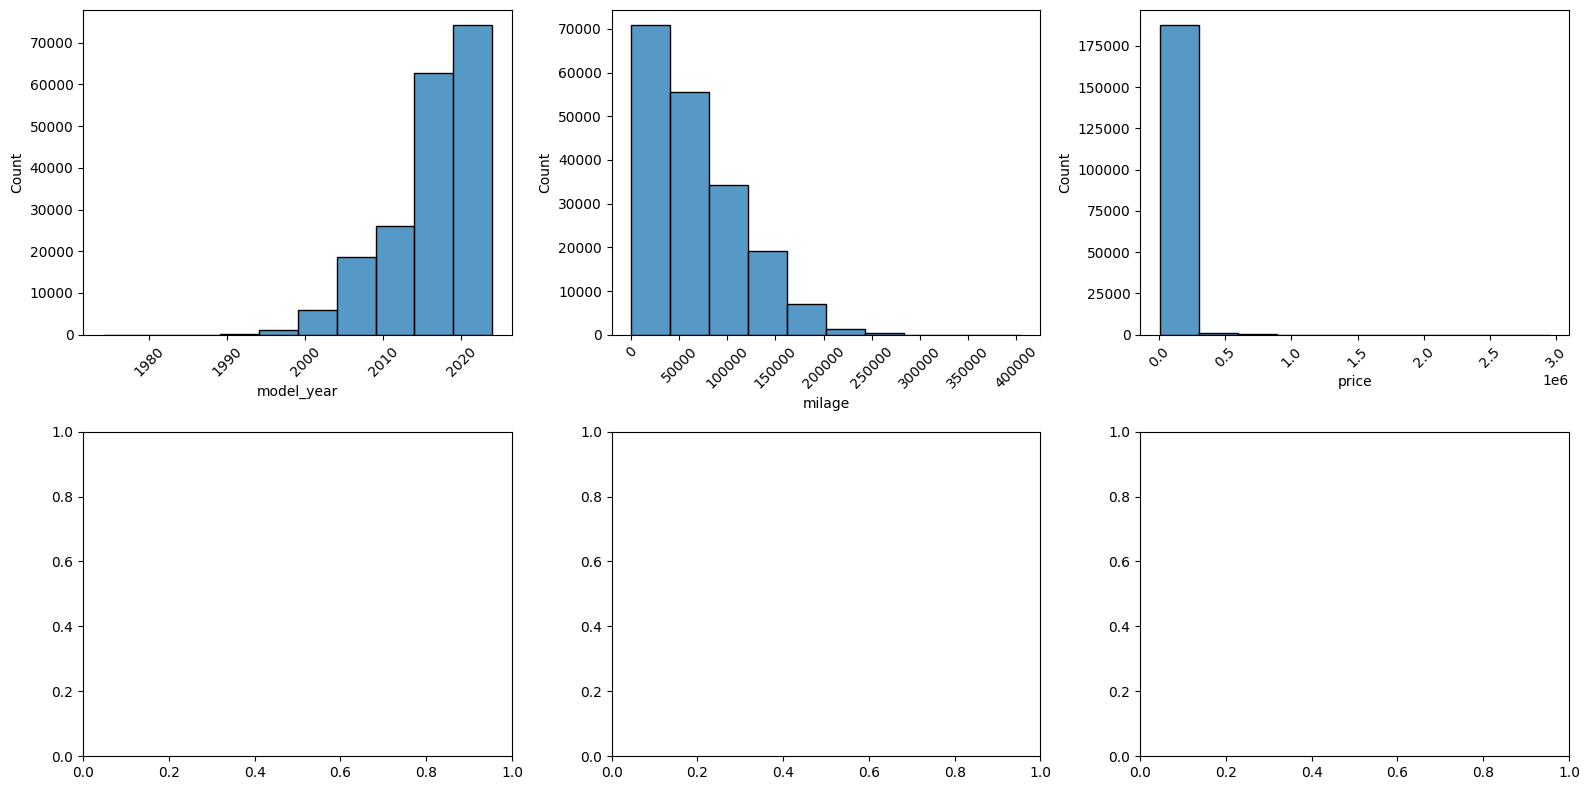

In [173]:
plt.subplots(2, 3, figsize=(16, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_train, x = col, bins=10)
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

C:\Users\skkav\AppData\Local\Temp\ipykernel_13944\3182883442.py:7: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


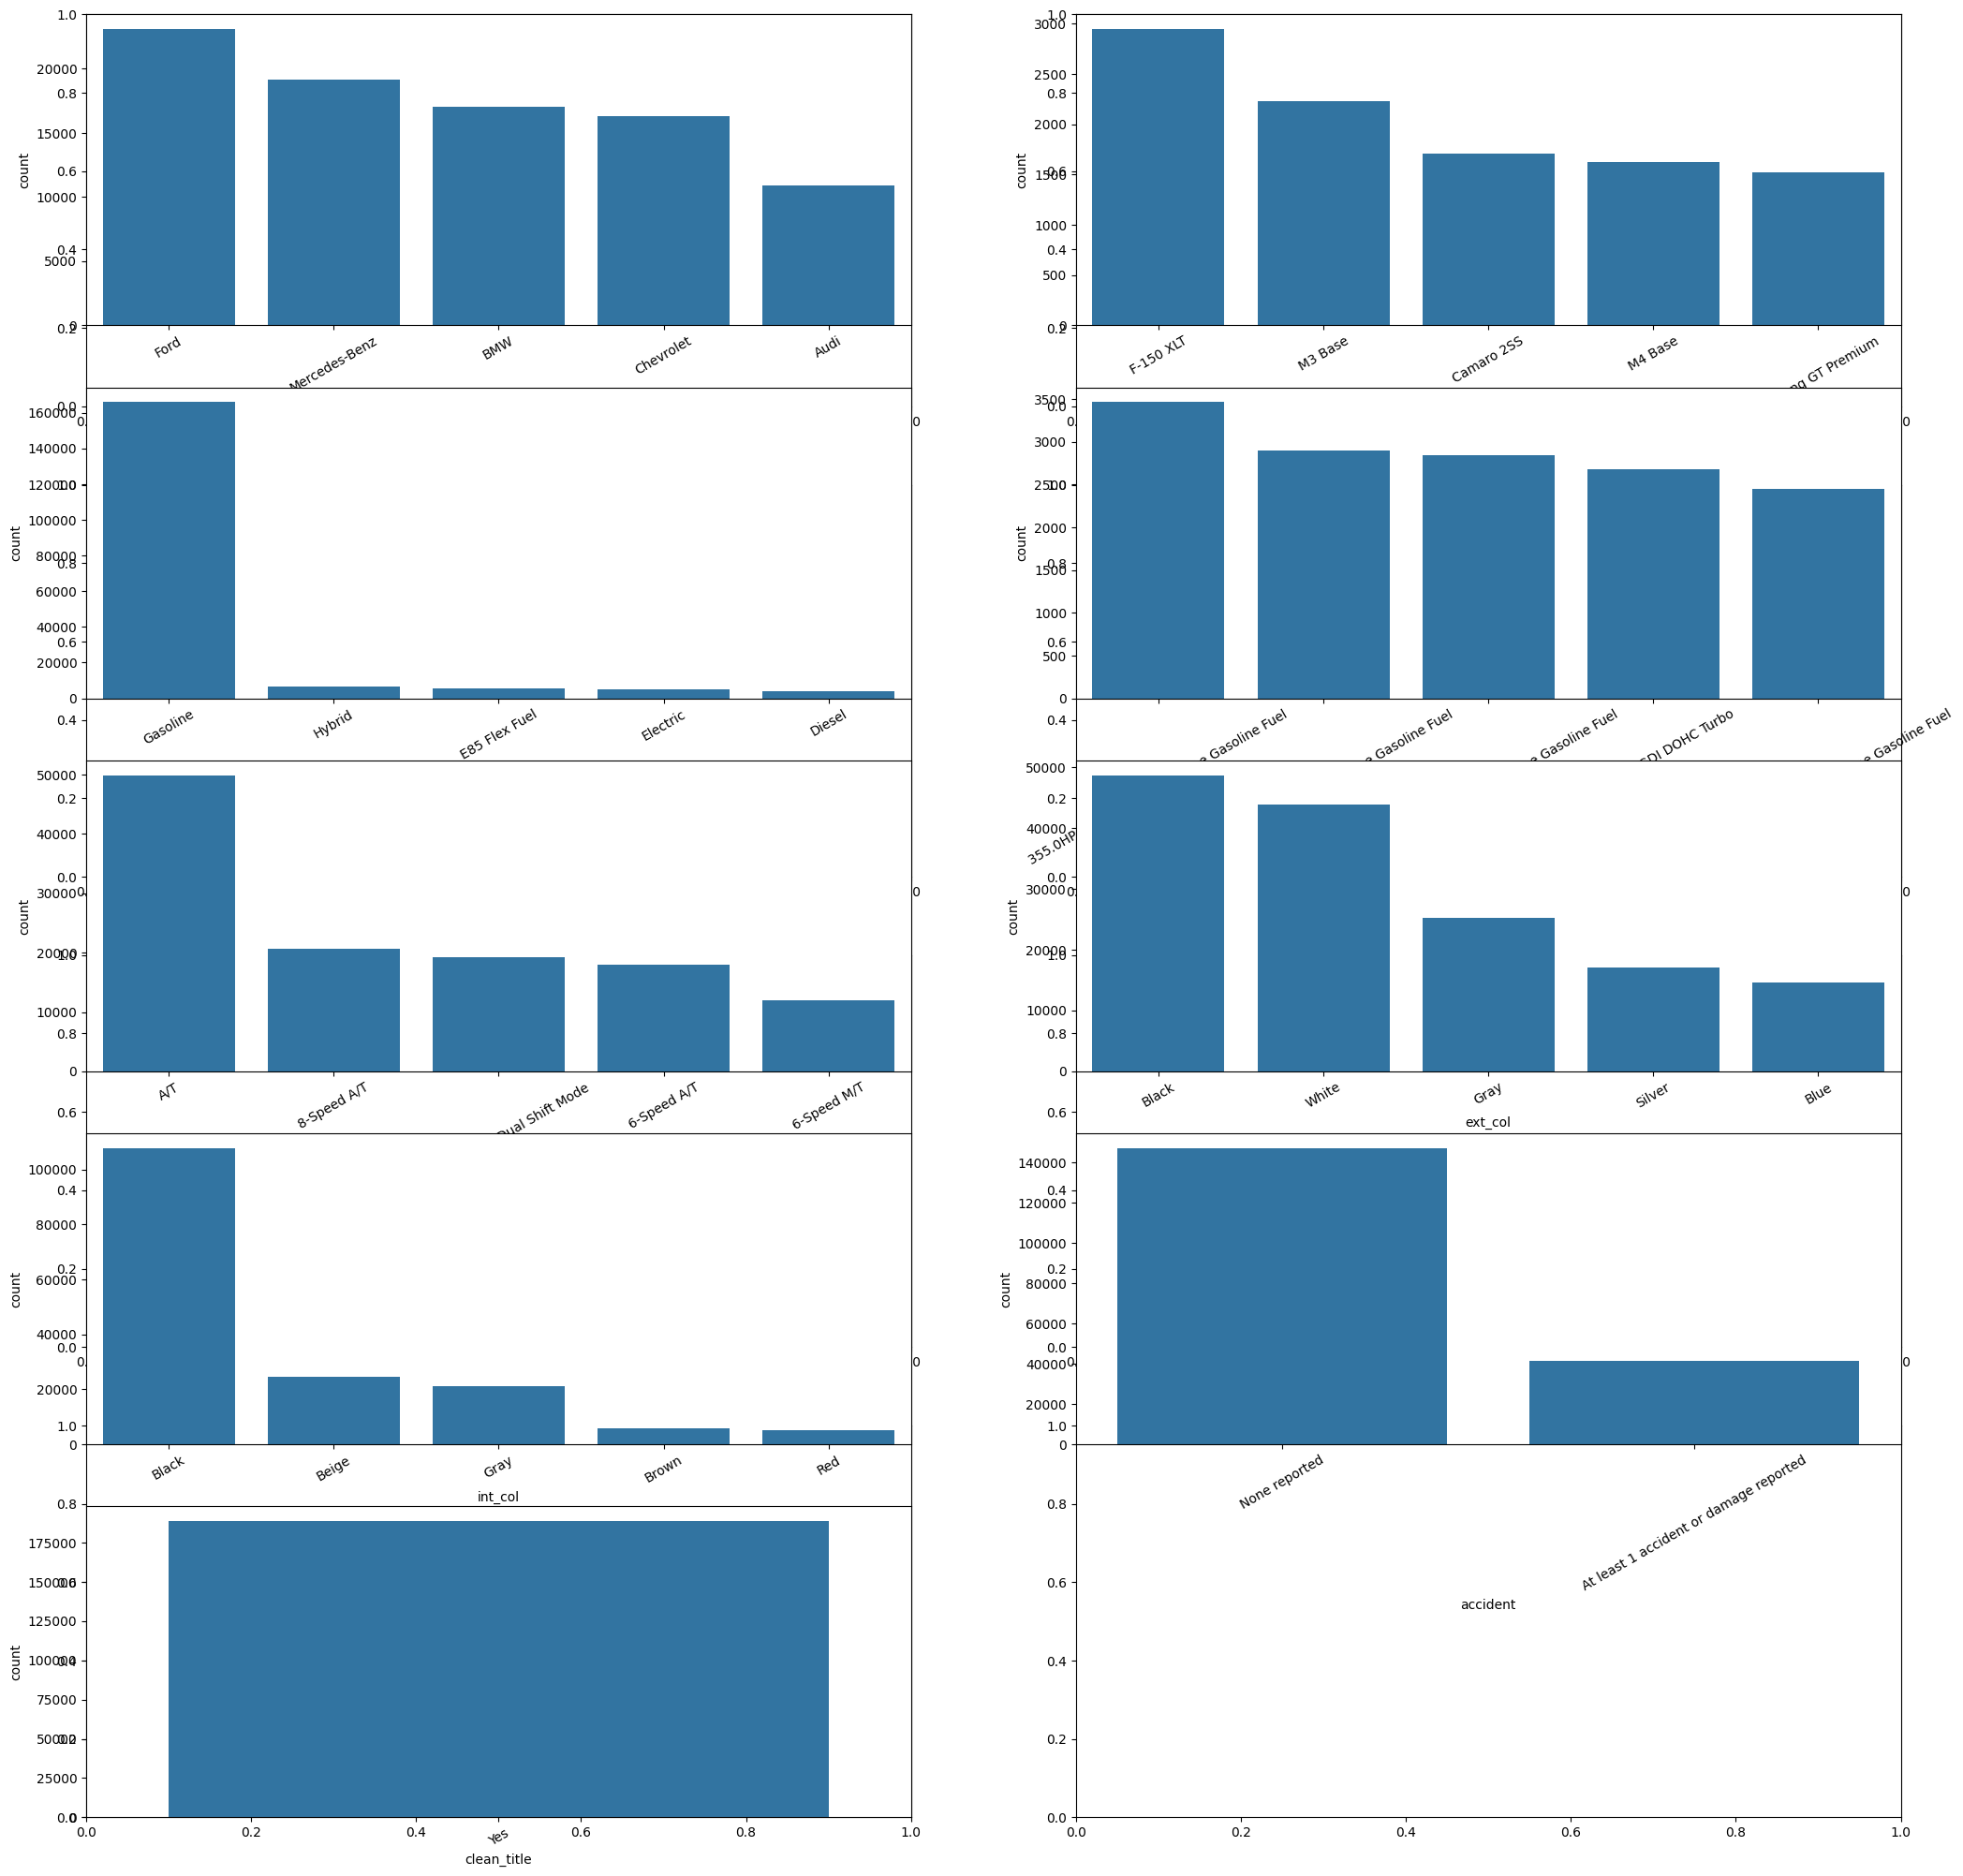

In [174]:
plt.subplots(4, 2, figsize=(25, 25))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df_train, x=col, dodge=False, order=df_train[col].value_counts()[:5].index)
    plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

In [175]:
#Data transformation before building the ML model in the train dataset
#Transforming categorical variable
df_train['clean_title'] = df_train['clean_title'].map({'Yes': 1, 'No': 0})
df_train['accident'] = df_train['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0})
#Converting model year to age
df_train['age'] = pd.Timestamp('now').year - df_train['model_year']
df_train.drop(columns='model_year',axis=1, inplace= True)

In [176]:
#Data transformation before building the ML model in the test dataset
#Transforming categorical variable
df_test['clean_title'] = df_test['clean_title'].map({'Yes': 1, 'No': 0})
df_test['accident'] = df_test['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0})
#Converting model year to age
df_test['age'] = pd.Timestamp('now').year - df_test['model_year']
df_test.drop(columns='model_year',axis=1, inplace= True)

In [177]:
numeric_columns = df_train.select_dtypes(include='number').columns
print("The numeric columns are: ", numeric_columns)

categorical_columns = df_train.select_dtypes(include='object').columns
print("The categorical columns are: ", categorical_columns)

The numeric columns are:  Index(['milage', 'accident', 'clean_title', 'price', 'age'], dtype='object')
The categorical columns are:  Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col'],
      dtype='object')


In [178]:
#Loading the necessary libraries and packages
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


In [179]:
X = df_train.drop(columns='price', axis=1)
y = df_train['price']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_eval.shape)
print(y_train.shape, y_eval.shape)

(150826, 11) (37707, 11)
(150826,) (37707,)


In [180]:
#Defining preprocessing for numeric features
numeric_cols = X.select_dtypes(include='number').columns
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Defining preprocessing for categorical features
categorical_cols = X.select_dtypes(include='object').columns
categoric_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('selector', SelectPercentile(chi2, percentile=50))
])

In [181]:
#Combining numeric and categorical transformers into one preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categoric_transformer, categorical_cols)
    ]
)

In [182]:
#Building a Linear Regression model
#Defining the linear regression pipeline
linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#Train the linear regression model
linear_reg.fit(X_train, y_train)

#Make predictions
y_pred_linear_reg = linear_reg.predict(X_eval)

#Calculating Root Mean Square Error
rmse_linear_reg = np.sqrt(mean_squared_error(y_eval, y_pred_linear_reg))
print(f'Linear Regression RMSE: {rmse_linear_reg:.3f}')

Linear Regression RMSE: 69171.904


In [183]:
#Predicting on test dataset
X_test = df_test
y_pred_test_linear_reg = linear_reg.predict(X_test)

In [184]:
#Creating submission file
submission = pd.DataFrame({
    'id': df_test['id'],
    'price': y_pred_test_linear_reg
})

submission.to_csv('linear_regression_submission.csv', index=False)
print("Linear Regression Submission file created successfully")


Linear Regression Submission file created successfully


In [185]:
#Building a XGBRegressor model
#Defining the XGBRegession pipeline
xgb_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regresspr', XGBRegressor())
])

#Train and evaluate the model
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_eval)
rmse_xgb_reg = np.sqrt(mean_squared_error(y_eval, y_pred_xgb))
print(f'XGBRegressor RMSE: {rmse_xgb_reg:.3f}')

XGBRegressor RMSE: 70366.809


In [186]:
#Predicting on test dataset
X_test = df_test
y_pred_test_xgb = xgb_reg.predict(X_test)

In [187]:
#Creating submission file
submission = pd.DataFrame({
    'id': df_test['id'],
    'price':y_pred_test_xgb
})

submission.to_csv('XGBRegressor_submission.csv', index=False)
print('XGBRegression Submission file created successfully')

XGBRegression Submission file created successfully
